# Passive Aggressive Classification

**Detecting Fake News**
([source link](https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/))

In this project, we are going to build a model to accurately classify a piece of news as REAL or FAKE.

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv('data/news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


## Distribution of labels

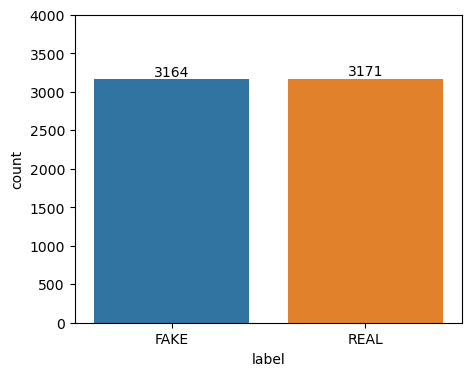

In [4]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(df, x="label")
ax.set_ylim([0, 4000])
for i in ax.containers:
    ax.bar_label(i)

## Matrix of features and labels

In [5]:
X = df["text"].values
y = df["label"].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (6335,)
y (6335,)


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (5068,)
X_test (1267,)
y_train (5068,)
y_test (1267,)


## Feature extraction with TF-IDF vectorizer

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF X_train shape: {X_train.shape}")
print(f"TF-IDF X_test  shape: {X_test.shape}")

TF-IDF X_train shape: (5068, 61651)
TF-IDF X_test  shape: (1267, 61651)


## Training the Passive Aggressive Classification model

In [8]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

## Predicting the test set

In [9]:
y_pred = pac.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,REAL,REAL
1,FAKE,FAKE
2,REAL,REAL
3,REAL,REAL
4,REAL,REAL
5,REAL,REAL
6,REAL,REAL
7,REAL,REAL
8,REAL,REAL
9,FAKE,FAKE


## Evaluating the model


Classification Report:
              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



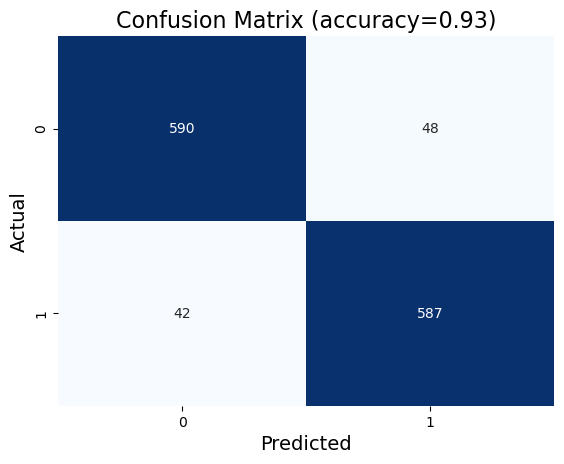

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);